# Markowitz Portfolio Theory

The combination of securities with little correlation allows investors to optimize their return without assuming additional risk. 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-09-24,143.550003,4455.479980
2021-09-27,141.660004,4443.109863
2021-09-28,140.589996,4352.629883
2021-09-29,142.020004,4359.459961
2021-09-30,140.994995,4348.310059


<AxesSubplot:xlabel='Date'>

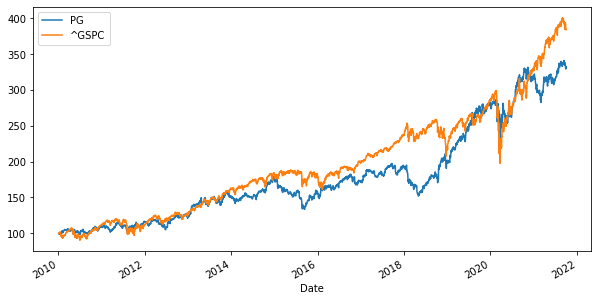

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.100963
^GSPC    0.113746
dtype: float64

In [9]:
log_returns.cov()

,PG,^GSPC
PG,0.000115,0.000068
^GSPC,0.000068,0.000119


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.00000,0.58631
^GSPC,0.58631,1.00000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.87884291, 0.10473191])

In [14]:
arr[0] + arr[1]

0.9835748245955076

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.23049227, 0.76950773])

In [16]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.11079920312655488

Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.025151290043073017

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.1585915825101478

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10811512086652988,
  0.11268128504347398,
  0.10269273710036617,
  0.10319185433921974,
  0.10702249198645512,
  0.11155209171684367,
  0.11348111109390703,
  0.10797041496250279,
  0.11163557853922217,
  0.11115321582486981,
  0.10507395544226582,
  0.10209970986913079,
  0.10616184550349088,
  0.1071210445269741,
  0.10900731907084679,
  0.10844089270298408,
  0.1012099656700909,
  0.10878299252850611,
  0.10783488815609182,
  0.10751535287240098,
  0.1084625403574213,
  0.10136871535411372,
  0.10836728698893863,
  0.1073587992288108,
  0.10659972530570092,
  0.10541938324715636,
  0.10576112398185483,
  0.10298839005362653,
  0.11183770355412152,
  0.10466123548159348,
  0.10248510075499628,
  0.10492579171479101,
  0.10301309372586484,
  0.10333696059817025,
  0.10785113224522345,
  0.10858650270822616,
  0.10664780843705926,
  0.10562560543270091,
  0.10776077377188102,
  0.10653457195211664,
  0.1088571634318838,
  0.10321455004598348,
  0.10180811241978695,
  0.108551383177

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.11317499, 0.11041735, 0.1124551 , 0.10545042, 0.10806578,
        0.10829714, 0.10504422, 0.10653024, 0.11197802, 0.10791004,
        0.10732206, 0.10823355, 0.10571979, 0.10956319, 0.11108869,
        0.10251175, 0.10865133, 0.10724921, 0.10777596, 0.10926375,
        0.10563556, 0.10893866, 0.10318194, 0.11216555, 0.10339342,
        0.10589006, 0.10411494, 0.11195611, 0.10660659, 0.11363164,
        0.1071711 , 0.10651842, 0.1089373 , 0.10935398, 0.10578181,
        0.1105693 , 0.10734348, 0.10336171, 0.10453204, 0.10936303,
        0.10975405, 0.10467924, 0.11282652, 0.105509  , 0.10988696,
        0.10598803, 0.10469107, 0.11158513, 0.10150825, 0.10856754,
        0.10549713, 0.1040016 , 0.10742509, 0.10242387, 0.11282299,
        0.10388159, 0.10739664, 0.10686272, 0.10682222, 0.11177932,
        0.10222077, 0.11163516, 0.10698417, 0.10252528, 0.10746708,
        0.10769278, 0.10518404, 0.10876572, 0.10185041, 0.10482858,
        0.1070833 , 0.10117088, 0.10985743, 0.10

In [28]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.113175,0.169095
1,0.110417,0.157333
2,0.112455,0.165451
3,0.105450,0.153307
4,0.108066,0.152491


In [30]:
portfolios.tail()

,Return,Volatility
995,0.110026,0.156176
996,0.111302,0.160439
997,0.109711,0.155342
998,0.112227,0.164379
999,0.104713,0.154720


Text(0, 0.5, 'Expected Return')

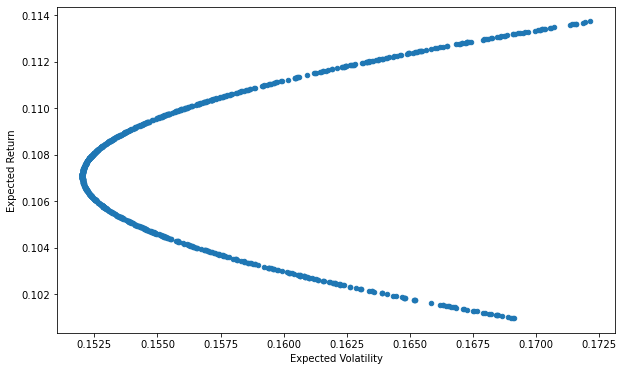

In [31]:
portfolios.plot(x='Volatility', y='Return', kind = 'scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')